In [2]:
# https://www.kaggle.com/harunshimanto/pandas-with-data-science-ai
# Importing Libraries
import pandas as pd

In [3]:
movies = pd.read_csv('movie.csv', sep=',')
print(type(movies))
movies.head(20)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
tags = pd.read_csv('tag.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [5]:
ratings = pd.read_csv('rating.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [21]:
ratings['timestamp'][0][6] # throws error as Timestamp object is not subscriptable

Timestamp('2005-04-02 23:53:47')

In [19]:
tags['timestamp'][0][6]  # Gets 6th index in timestamp (2009-0'4'-24 18:19:40)

'4'

In [22]:
# For current analysis, we will remove timestamp
del ratings['timestamp']
del tags['timestamp']

#### Data Structures
#### Series

In [23]:
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [24]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [25]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [26]:
row_0['userId']

18

In [27]:
'rating' in row_0

False

In [31]:
row_0.name

'firstRow'

In [30]:
row_0 = row_0.rename('firstRow')
row_0.name

'firstRow'

In [32]:
# DataFrames
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [33]:
tags.index # Gives the number of rows in tags.csv

RangeIndex(start=0, stop=465564, step=1)

In [34]:
tags.columns # Gives column details (except timestamp as it was already removed)

Index(['userId', 'movieId', 'tag'], dtype='object')

In [35]:
tags.iloc[ [0,11,500] ] # Get rows 0, 11 & 500

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


#### Descriptive Statistics
* Lets look how the ratings are distributed

In [36]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [37]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [38]:
ratings['rating'].mean() # Gives 'mean' of 'rating' column

3.5255285642993797

In [39]:
ratings.mean() # Gives 'mean' of all the columns

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [40]:
ratings['rating'].min() # Shows the least rating

0.5

In [41]:
ratings['rating'].max() # Shows the highest rating

5.0

In [42]:
ratings['rating'].std()

1.051988919275684

In [43]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [44]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [45]:
filter1 = ratings['rating'] > 10 # Get list of rows where rating > 10
print(filter1)
filter1.any() # Will return False - because not a single element will return True.

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [46]:
filter2 = ratings['rating'] > 0
filter2.all() # Will return True - because every rating > 0 (recall we got min is 0.5 earlier)

True

#### Data Cleaning: Handling Missing Data
* In Pandas, a missing value is denoted by `NaN`

In [47]:
movies.shape # Returns number of rows and columns

(27278, 3)

In [49]:
movies.isnull().any().any()
# This line evaluates to a boolean True/False, 
# as it checks whether the Pandas dataframe contains any NaN's in its rows or columns. 

False

In [50]:
ratings.shape # Returns number of rows and columns

(20000263, 3)

In [51]:
ratings.isnull().any().any()
# This line evaluates to a boolean True/False, 
# as it checks whether the Pandas dataframe contains any NaN's in its rows or columns. 

False

In [52]:
tags.shape

(465564, 3)

In [53]:
tags.isnull().any().any()
# Returning True means there is one or more NaN. Lets handle it.

True

In [54]:
tags = tags.dropna()
tags.isnull().any().any()

False

In [55]:
tags.shape
# Notice the number of rows have reduced (we have dropped NaN entries)

(465548, 3)

#### Data Visualization
* Lets see `matplotlib`

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

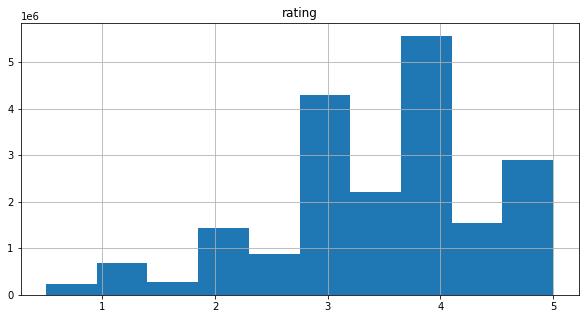

In [56]:
%matplotlib inline
ratings.hist(column='rating', figsize=(10,5))

<AxesSubplot:>

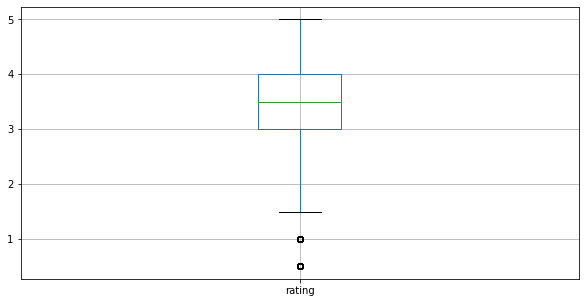

In [57]:
ratings.boxplot(column='rating', figsize=(10,5))

#### Slicing Out Columns

In [61]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [62]:
movies[ ['title', 'genres'] ]. head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [63]:
ratings[-10:] # Last 10 rows

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [65]:
tag_counts = tags['tag'].value_counts() # consolidating movies based on 'tags'
tag_counts[:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

In [66]:
tag_counts[-10:]

missing child                    1
Ron Moore                        1
Citizen Kane                     1
mullet                           1
biker gang                       1
Paul Adelstein                   1
the wig                          1
killer fish                      1
genetically modified monsters    1
topless scene                    1
Name: tag, dtype: int64

<AxesSubplot:>

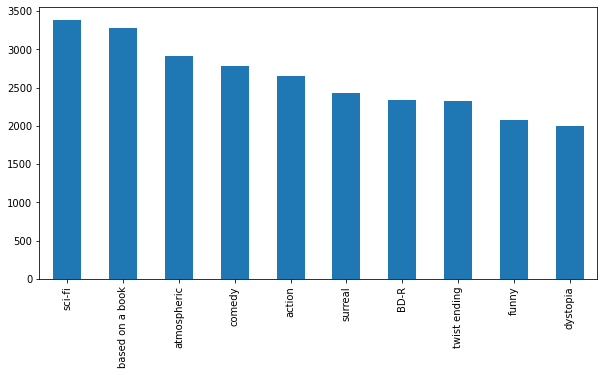

In [67]:
tag_counts[:10].plot(kind='bar', figsize=(10,5))

#### Filters for Selecting Rows

In [70]:
is_highly_rated = ratings['rating'] >= 5.0
ratings[is_highly_rated][30:50]

,userId,movieId,rating
239,3,50,5.0
242,3,175,5.0
244,3,223,5.0
245,3,260,5.0
246,3,316,5.0
247,3,318,5.0
248,3,329,5.0
252,3,457,5.0
253,3,480,5.0
254,3,490,5.0


In [71]:
is_action = movies['genres'].str.contains('Action')
movies[is_action][5:15]

,movieId,title,genres
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
69,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
70,71,Fair Game (1995),Action
75,76,Screamers (1995),Action|Sci-Fi|Thriller
77,78,"Crossing Guard, The (1995)",Action|Crime|Drama|Thriller
85,86,White Squall (1996),Action|Adventure|Drama


In [73]:
movies[is_action].head(15)

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
14,15,Cutthroat Island (1995),Action|Adventure|Romance
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller


#### Group By and Aggregate

In [74]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [76]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [77]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [78]:
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


#### Merge DataFrames

In [79]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [80]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [83]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


#### Combine aggreagation, merging, and filters to get useful analytics

In [86]:
avg_ratings= ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [88]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [89]:
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [90]:
is_Adventure = box_office['genres'].str.contains('Adventure')
box_office[is_Adventure][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
7,8,Tom and Huck (1995),Adventure|Children,3.142049
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.430029
12,13,Balto (1995),Adventure|Animation|Children,3.272416


In [91]:
box_office[is_Adventure & is_highly_rated][-5:]

,movieId,title,genres,rating
26611,130586,Itinerary of a Spoiled Child (1988),Adventure|Drama,4.5
26655,130996,The Beautiful Story (1992),Adventure|Drama|Fantasy,5.0
26667,131050,Stargate SG-1 Children of the Gods - Final Cut...,Adventure|Sci-Fi|Thriller,5.0
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


#### Vectorized String Operations

In [92]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Split 'genres' into multiple columns

In [96]:
movie_genres = movies['genres'].str.split('|',expand=True)
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


#### Add a new column for Comedy genre flag

In [97]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


#### Extract year from title e.g. (2007)

In [98]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


#### Parsing Timestamps
* Timestamps are common in sensor data or other time series datasets. Let us revisit the tags.csv dataset and read the timestamps!

In [102]:
tags = pd.read_csv('tag.csv', sep=',')
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp    object
dtype: object

In [103]:
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [106]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='ns')

In [107]:
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [108]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,2009-04-24 18:19:40,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18,2013-05-10 01:41:18


In [109]:
# Selecting rows based on timestamp
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

((465564, 5), (12130, 5))

In [110]:
# Sorting the table using the timestamps
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,2005-12-24 13:00:10,2005-12-24 13:00:10
333927,100371,1732,coen brothers,2005-12-24 13:00:36,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,2005-12-24 13:00:48,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,2005-12-24 13:02:51,2005-12-24 13:02:51
333939,100371,5004,peter sellers,2005-12-24 13:03:19,2005-12-24 13:03:19
333922,100371,47,morgan freeman,2005-12-24 13:03:32,2005-12-24 13:03:32
333921,100371,47,brad pitt,2005-12-24 13:03:32,2005-12-24 13:03:32
333936,100371,4011,brad pitt,2005-12-24 13:03:51,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,2005-12-24 13:03:51,2005-12-24 13:03:51
333920,100371,32,bruce willis,2005-12-24 13:04:02,2005-12-24 13:04:02


#### Average Movie Ratings over TIme
#### Movie ratings related to the year of launch?

In [111]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [112]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

,movieId,rating
movieId,1.000000,-0.090369
rating,-0.090369,1.000000
